# Industry - Billionare Analysis
This section focuses on analyzing the role of various industries in contributing to the immense wealth of billionaires. We've used Forbes time series data from 2000 to 2023, which includes industry-specific information of billionaires. Our main goal is to identify which industries have been most influential in creating extreme wealth, how industry trends have evolved over time.

IMPORTANT NOTE: Please take note that within the project, there are remote URL addresses provided for accessing the dataset. However, if you encounter any issues accessing the datasets remotely, you can use the commented line below, which contains a relative path for accessing the datasets.

## Importing Libraries & Datasets

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
plt.style.use("cyberpunk")
import ast

In [22]:
dataset_2023 = '../Datasets/billionaires_2023.csv'
url_2023 = 'https://raw.githubusercontent.com/hcagatayyilmaz/data-literacy-extreme-wealth-analysis/main/Datasets/billionaires_2023.csv'
dataset_2020_2023 = '../Datasets/billionaires_2000_2023.csv'
url_2020_2023 = 'https://raw.githubusercontent.com/hcagatayyilmaz/data-literacy-extreme-wealth-analysis/main/Datasets/billionaires_2000_2023.csv'

# If you encounter any error while reading the csv file, you can use the relative import instead.
dataset_2023 = pd.read_csv(url_2023)
dataset_2000_2023 = pd.read_csv(url_2020_2023)

# dataset_2023 = pd.read_csv(dataset_2023)
# dataset_2000_2023 = pd.read_csv(dataset_2020_2023)


## How is the Business Industry Linked to Extreme Wealth through Industry Volume Analysis?
Firstly, we began by analyzing business industries in the latest published Forbes dataset for 2023. The primary objective of this section is to understand the contributions and key drivers of business industries that account for a significant portion of the wealth held by billionaires. In the plot below, the y-axis represents the total number of billionaires in each business industry, the x-axis displays the names of the business industries, and the size of the bubbles corresponds to the total wealth within that industry.

Technology is the business industry that contributes the most money owned by billionaires, totaling approximately $1.87 trillion.
Finance and Investment is the business industry with the highest number of individuals who have amassed extreme wealth, with more than 400 people. Despite having fewer than 300 individuals in the Fashion & Retail business industry, it ranks second in terms of total net worth. This suggests that the total net worth per person within this category is relatively higher. Automative has the

                 Industry  Wealth  Count  Normalized Wealth
0              Technology  1877.9    314           5.980573
1        Fashion & Retail  1698.8    266           6.386466
2   Finance & Investments  1605.1    372           4.314785
3           Manufacturing  1019.0    324           3.145062
4         Food & Beverage   957.2    212           4.515094
5             Diversified   905.2    187           4.840642
6             Real Estate   657.4    193           3.406218
7              Healthcare   643.2    201           3.200000
8              Automotive   525.3     73           7.195890
9                  Energy   453.5    100           4.535000
10        Metals & Mining   446.8     74           6.037838
11  Media & Entertainment   427.5     91           4.697802
12              Logistics   239.5     40           5.987500
13                Telecom   203.5     31           6.564516
14                Service   173.4     53           3.271698
Total Net Worth of All Industries: $1220

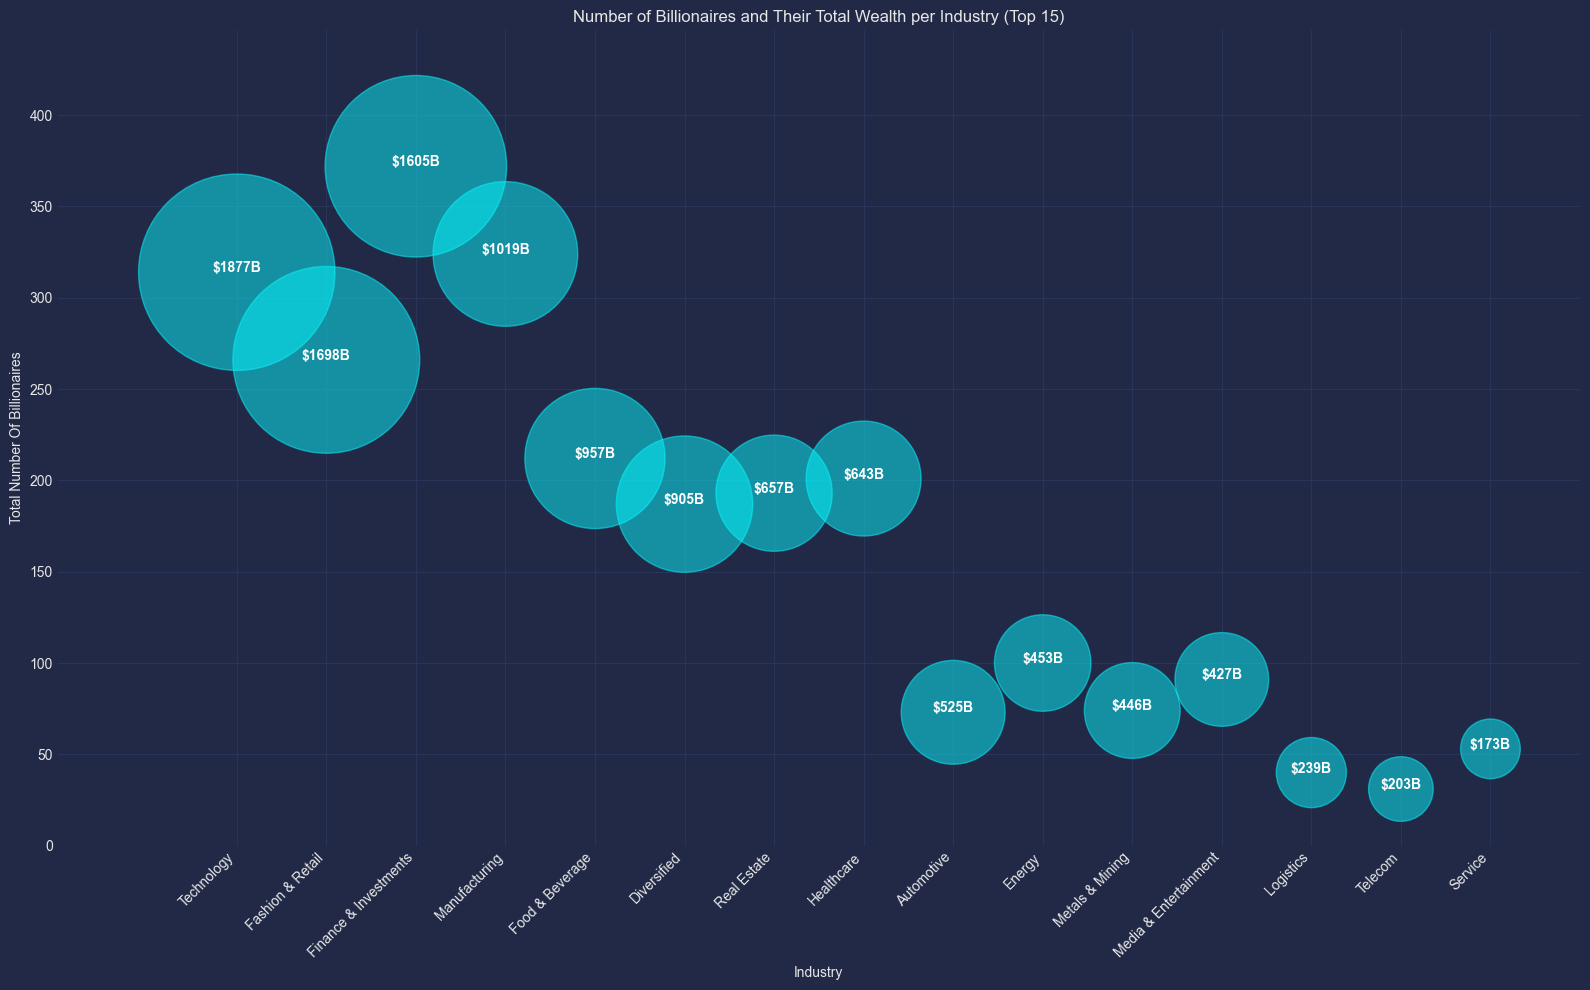

In [23]:

try:
    # Calculating the total wealth and the number of billionaires per industry
    industry_wealth = dataset_2023.groupby('industries')['finalWorth'].sum().nlargest(15)
    industry_counts = dataset_2023['industries'].value_counts().loc[industry_wealth.index]

    # Creating a DataFrame from the wealth sums and counts
    df1 = pd.DataFrame({'Industry': industry_wealth.index, 'Wealth': industry_wealth.values / 1000, 'Count': industry_counts.values})

    # Creating the normalized wealth (Wealth per person)
    df1['Normalized Wealth'] = df1['Wealth'] / df1['Count']

    print(df1)

    # Normalizing the Wealth values for bubble sizes
    # Here we normalize the sizes to ensure that even the smallest bubble is visible and the largest doesn't overwhelm the chart
    max_bubble_size = 20000  # Adjust the maximum bubble size as needed
    df1['Wealth_scaled'] = (df1['Wealth'] / df1['Wealth'].max()) * max_bubble_size

    # Creating the bubble chart using Matplotlib
    plt.figure(figsize=(16, 10))  # Adjusted figure size for better visibility
    scatter = plt.scatter(df1['Industry'], df1['Count'], s=df1['Wealth_scaled'], alpha=0.5)
    
    try:
        total_net_worth = dataset_2023['finalWorth'].sum()
        print(f"Total Net Worth of All Industries: ${total_net_worth / 1000} billion")
    except Exception as e:
        print(f"Error: {e}")

    # Adding annotations inside the bubbles
    for i, row in df1.iterrows():
        plt.text(row['Industry'], row['Count'], f"${int(row['Wealth'])}B", 
                 horizontalalignment='center', fontsize=10, color='white', weight='bold')

    # Adjust the axes for better fit, adding some padding around the bubbles
    plt.xticks(rotation=45, ha='right')
    plt.xlim([-2, len(df1['Industry'])])  # Set x-axis limits to add padding
    plt.ylim(0, max(df1['Count'])*1.2)  # Set y-axis limits to add padding
    plt.xlabel('Industry')
    plt.ylabel('Total Number Of Billionaires')
    plt.title('Number of Billionaires and Their Total Wealth per Industry (Top 15)')
    plt.grid(True)

    # Show the bubble chart
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error: {e}")

### Extreme Wealth in Time Series Data (2000-2023)

After examining the latest trends in the business industry, our next goal is to understand how extreme wealth has evolved over the years, as it is closely tied to time. To gain a comprehensive perspective on extreme wealth, we have chosen the new millennium as our starting point, as it provides more consistent data. Our primary focus is on analyzing the trend from 2000 to 2023.

The graph clearly illustrates a significant increase in extreme wealth during these years, with billionaires amassing over 12 trillion USD in wealth. To put this figure into context, consider that the third-largest economy in the world had a GDP of approximately 5 trillion USD. This implies that the collective wealth of these billionaires surpasses double the size of Japan's entire annual economic output, as well as the U.S. federal budget for the fiscal year 2021, which was around 6.8 trillion USD.

A closer examination of the trend reveals several pivotal changes. The first occurred in 2008 when individuals with extreme wealth lost nearly 30% of their fortunes during the Global Financial Crisis. Another noticeable dip occurred in 2016. However, the most striking development was observed during the Global Pandemic, with an almost 60% surge in wealth in 2021, followed by a declining trend thereafter.


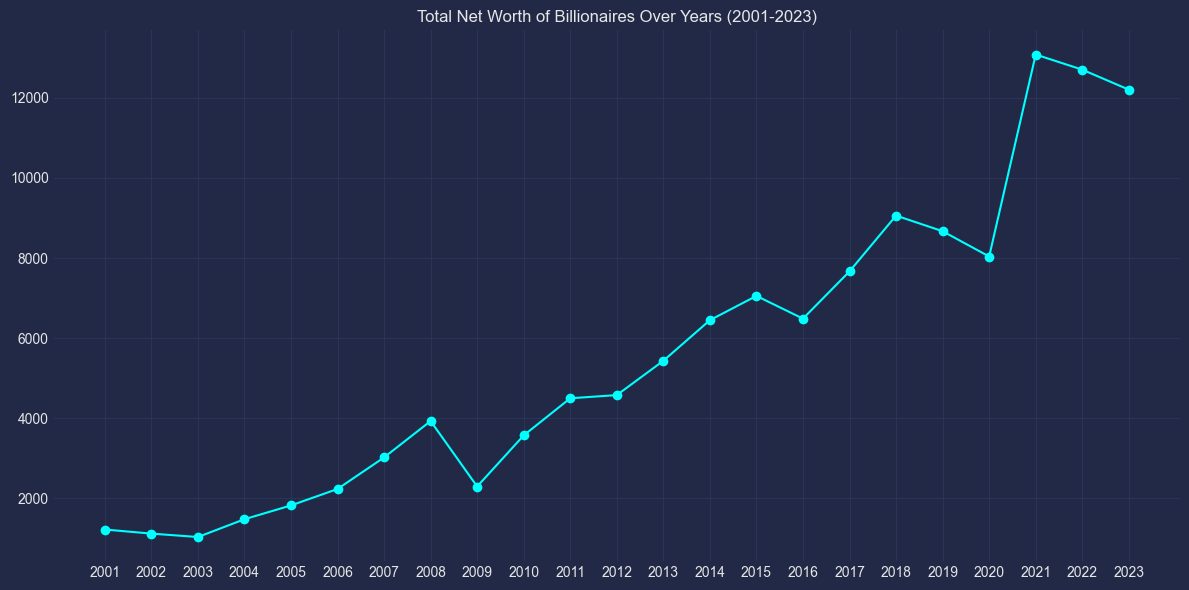

In [24]:
# Convert Net Worth to numeric
dataset_2000_2023['net_worth'] = dataset_2000_2023['net_worth'].replace({'\$': '', ' B': ''}, regex=True).astype(float)
# Filter data for years between 2000 and 2023
filtered_data = dataset_2000_2023[(dataset_2000_2023['year'] >= 2001) & (dataset_2000_2023['year'] <= 2023)]
# Group by year and sum net worth
yearly_total = filtered_data.groupby('year')['net_worth'].sum()

# Ensure the 'year' in 'yearly_total' and 'us_fed_rate_yearly' is of the same data type
yearly_total.index = yearly_total.index.astype(str)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the total net worth by year
plt.plot(yearly_total.index, yearly_total, marker='o', color='cyan', label='Total Net Worth')

# Set the title and add gridlines
plt.title('Total Net Worth of Billionaires Over Years (2001-2023)')
plt.grid(True)

# Show the plot with a tight layout to fit all labels and legends
plt.tight_layout()
plt.show()

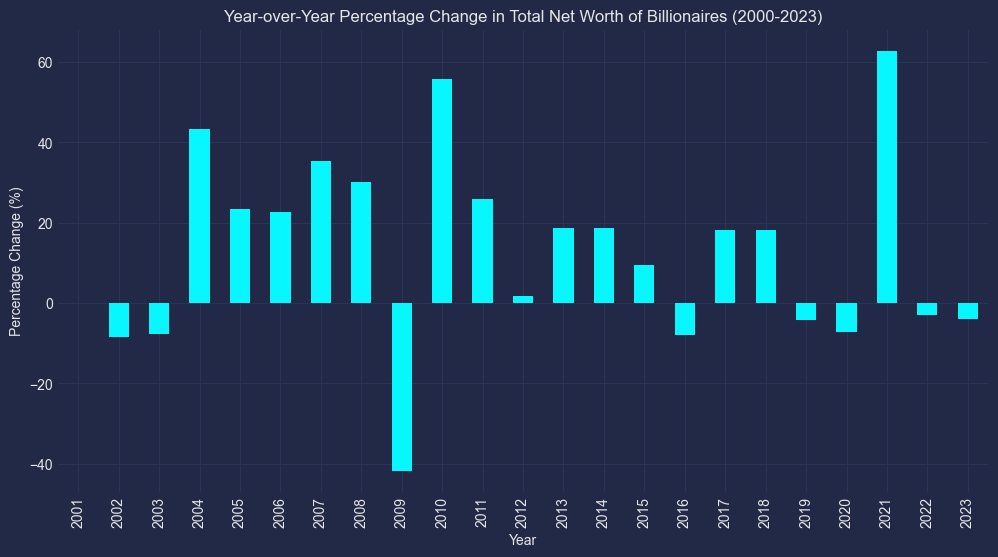

In [25]:
# Calculate the percentage change year over year
yearly_change = yearly_total.pct_change() * 100  # Convert to percentage
# Optional: Plotting the percentage change
plt.figure(figsize=(12, 6))
yearly_change.plot(kind='bar')
plt.title('Year-over-Year Percentage Change in Total Net Worth of Billionaires (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

### Business Industry Preprocessing

When categorizing the annual total net worth of billionaires, it becomes easier to discern trends in different industries. In this section of the analysis, we'll start by discussing the structure and processing methods of the data. The dataset was initially compiled by manually inputting pre-digital data from Forbes, which presented some standardization challenges. These format-related issues were promptly addressed, and relevant category data was integrated to update the net worth values for each category, annually. However, the primary challenge was categorizing the industries that lacked standardization. This required manual examination and grouping. For example, Michael Bloomberg's 2009 data listed his occupation as "Politician," likely due to his role as the Mayor of NYC at the time. Therefore, individuals like him were re-categorized based on their primary source of income. Additionally, categories with few billionaires or those used sporadically were combined into broader umbrella categories. 


Data for the "Agriculture" category is available until 2009, after which the relevant billionaires were recorded in different categories, so they were combined with the "Food and Beverages" category. Also, "Politics" has been removed as a business industry. Because, Silvio Berlusconi, initially categorized as a politician during his tenure as the Prime Minister of Italy, was later reclassified because his primary income was from an investment company. The Chilean president was similarly labeled as a politician during his term. Given that the color palette supports 20 categories, the "Politics" category was deemed irrelevant and thus removed, with corresponding updates made in the dataset manually.

## The Impact of Global Events on the Wealth of Billionaires Across Industries

Before the 2008 financial crisis, finance and investment were the predominant sources of extreme wealth. However, the crisis marked a significant downturn across nearly all business sectors. By 2016, a notable shift occurred, with technology emerging as the leading source of extreme wealth, eclipsing both retail and fashion. The period between 2000 and 2023, which includes two major global crises—the 2008 financial crisis and the pandemic—presents an interesting contrast. Contrary to the 2008 crisis, the pandemic led to a sharp increase in billionaire wealth, particularly in the technology sector. This divergent trend suggests that, while billionaires generally faced financial losses during the pandemic that began in 2020, the technology industry not only remained unaffected but actually experienced growth. This growth was exclusive to the technology sector, as declines were observed in all other industries.

Following 2020, there was a significant surge in wealth across various business sectors, but this was followed by a decline during 2022-2023. This fluctuation can be attributed to two main factors: the substantial funds released into the market by central banks to counteract a recession, such as financial aids and stipends. These interventions had a temporary bolstering effect on several industries, leading to the observed patterns in billionaire wealth.

/var/folders/p5/9pt_428x1_58kc40jyglstlh0000gn/T/ipykernel_69876/1405054670.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(industries)).colors  # 'tab20' colormap has 20 unique colors
/var/folders/p5/9pt_428x1_58kc40jyglstlh0000gn/T/ipykernel_69876/1405054670.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(industries)).colors  # 'tab20' colormap has 20 unique colors


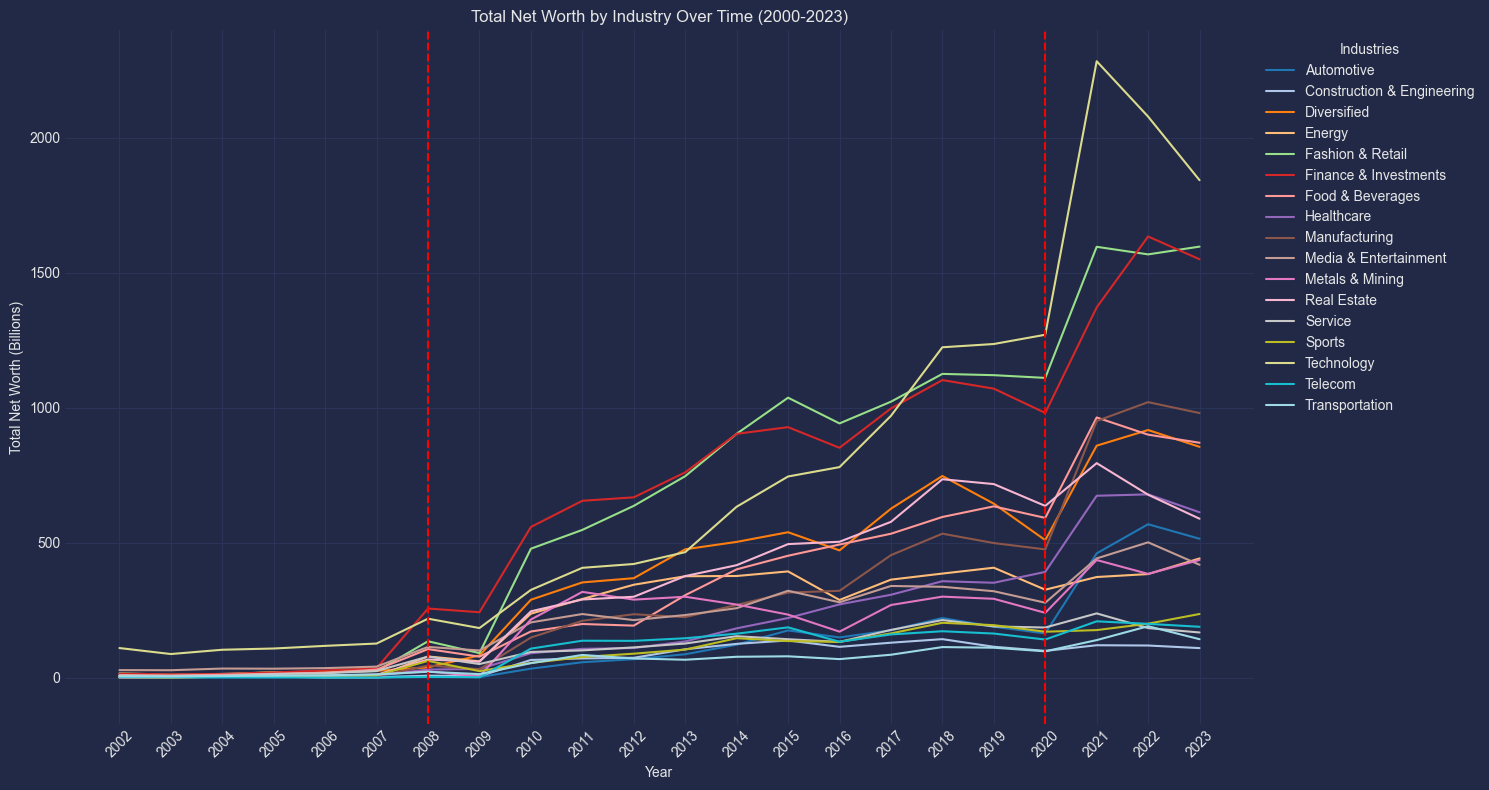

In [27]:
#Using dataset from URL, if you encounter with any error please use relative path to reach dataset
dataset2000_2023 = pd.read_csv(url_2020_2023)
# dataset2000_2023 = pd.read_csv('../Datasets/billionaires_2000_2023.csv')
dataset2000_2023 = dataset2000_2023[['year', 'full_name', 'net_worth', 'country_of_citizenship','business_industries','wealth_status']].dropna()

def process_business_industries(row):
    # Check if the value in the 'business_industries' column is a string
    if isinstance(row['business_industries'], str):
        try:
            # Attempt to parse the string representation of the list
            industries_list = ast.literal_eval(row['business_industries'])
            # Check if it's a list and get the first value if available
            if isinstance(industries_list, list) and len(industries_list) > 0:
                return industries_list[0]
            else:
                return None  # Return None if not a list or list is empty
        except (ValueError, SyntaxError):
            return None  # Return None if parsing fails
    else:
        return row['business_industries']  # If it's already a non-string type, return it as is

# Apply the custom function to the 'business_industries' column
dataset2000_2023['business_industries'] = dataset2000_2023.apply(process_business_industries, axis=1)

def standardize_industries(df):
    df['business_industries'] = df['business_industries'].str.replace('&#38;', '&', regex=False)

    # Define a dictionary for conditions and replacements
    replacements = {
        'Construction': 'Construction & Engineering',
        'Food': 'Food & Beverages',
        'Energy': 'Energy',
        'Retail': 'Fashion & Retail',
        'Finance': 'Finance & Investments',
        'Health': 'Healthcare',
        "Internet": 'Technology',
        "Investments": "Finance & Investments",
        'Food': 'Food & Beverage',
        'Media': 'Media & Entertainment',
        'Metals': 'Metals & Mining',
        'Real': 'Real Estate',
        'Software': 'Technology',
        'Technology': 'Technology',
        'Sports': 'Sports',
        'Telecom': 'Telecom',
        'Billionaire': "Diversified",
        'Beverage': 'Food & Beverages',
        'Services': 'Consumer Services',
        'Consumer': 'Consumer Services',
        'Casino':'Gambling',
        'Steel':'Metals & Mining',
        'Coal': 'Metals & Mining',
        'Service': 'Consumer Services',
        'Consumer Services': 'Service',
        'Healthcare': 'Insurance',
        'Gaming': 'Sports',
        'Insurance': 'Healthcare',
        'Pharmaceuticals': 'Biotechnology',
        'Medicine': 'Biotechnology',
        'Oil': 'Energy',
        'Luxury Goods': 'Fashion & Retail',
        'Banks': 'Finance & Investments',
        'Celebrity': 'Media & Entertainment',
        'Shipping': 'Logistics',
        'Logistics': 'Transportation',
        'Electronics': 'Technology',
        'Chemicals': 'Metals & Mining',
        'Gambling': 'Sports',
        'Business': 'Diversified',
        'Apparel': 'Fashion & Retail',
        'Biotechnology': 'Healthcare',
        'Agriculture': 'Food & Beverages'
    }

    # Iterate over the dictionary and replace values conditionally
    for key, value in replacements.items():
        df['business_industries'] = df['business_industries'].apply(
            lambda x: value if key in x else x
        )

    # Optionally, standardize to remove trailing whitespaces
    df['business_industries'] = df['business_industries'].str.strip()

    return df

standardize_industries(dataset2000_2023)
# Exclude entries related to 'politics'
dataset2000_2023 = dataset2000_2023[~dataset2000_2023['business_industries'].str.contains('politics', case=False, na=False)]

# Convert 'net_worth' to numeric
dataset2000_2023['net_worth'] = dataset2000_2023['net_worth'].str.rstrip('B').astype(float)

# Filter data for years between 2000 and 2022
filtered_df = dataset2000_2023[(dataset2000_2023['year'] >= 2001) & (dataset2000_2023['year'] <= 2023)]

# Group by 'year' and 'business_industries', and calculate the total net worth
industry_yearly_sum = filtered_df.groupby(['year', 'business_industries'])['net_worth'].sum().reset_index()

# Create a pivot table
pivot_table = industry_yearly_sum.pivot(index='year', columns='business_industries', values='net_worth').fillna(0)
# Sort industries within each year in ascending order
sorted_pivot_table = pivot_table.apply(lambda x: x.sort_values(ascending=True), axis=1)

# Generate a color palette with a unique color for each industry
industries = pivot_table.columns
colors = plt.cm.get_cmap('tab20', len(industries)).colors  # 'tab20' colormap has 20 unique colors

# Ensure years are treated as categorical variables and set the x-ticks)
pivot_table.index = pivot_table.index.astype(str)

# Set the figure size
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# Generate a color palette with a unique color for each industry
industries = pivot_table.columns
colors = plt.cm.get_cmap('tab20', len(industries)).colors  # 'tab20' colormap has 20 unique colors

# Ensure years are treated as categorical variables and set the x-ticks
years = pivot_table.index.astype(str)

# Create a line plot for each industry
for i, industry in enumerate(industries):
    plt.plot(years, pivot_table[industry].values, label=industry, color=colors[i])

# Set the title and labels
plt.title('Total Net Worth by Industry Over Time (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Total Net Worth (Billions)')

# Add grid lines to the plot for better readability
plt.grid(True)

# Adjust y-axis limits to position zero slightly below the middle
y_min, y_max = plt.ylim()
if y_min < 0:
    plt.ylim(bottom=y_min * 1.5)  # Adjust the lower bound if necessary

# Add a legend to the plot
# Adjust the location of the legend.
plt.legend(title='Industries', loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the x-axis labels (years) are displayed correctly and are readable
plt.xticks(rotation=45)

# Add red vertical lines for the years 2008, 2016, and 2020
plt.axvline(x='2008', color='red', linestyle='--')
plt.axvline(x='2020', color='red', linestyle='--')

# Show the plot
plt.tight_layout()  # This will adjust the plotting area to fit all labels and legends properly
plt.show()

Data loaded successfully.
Error setting year as index: "None of ['year'] are in the columns"


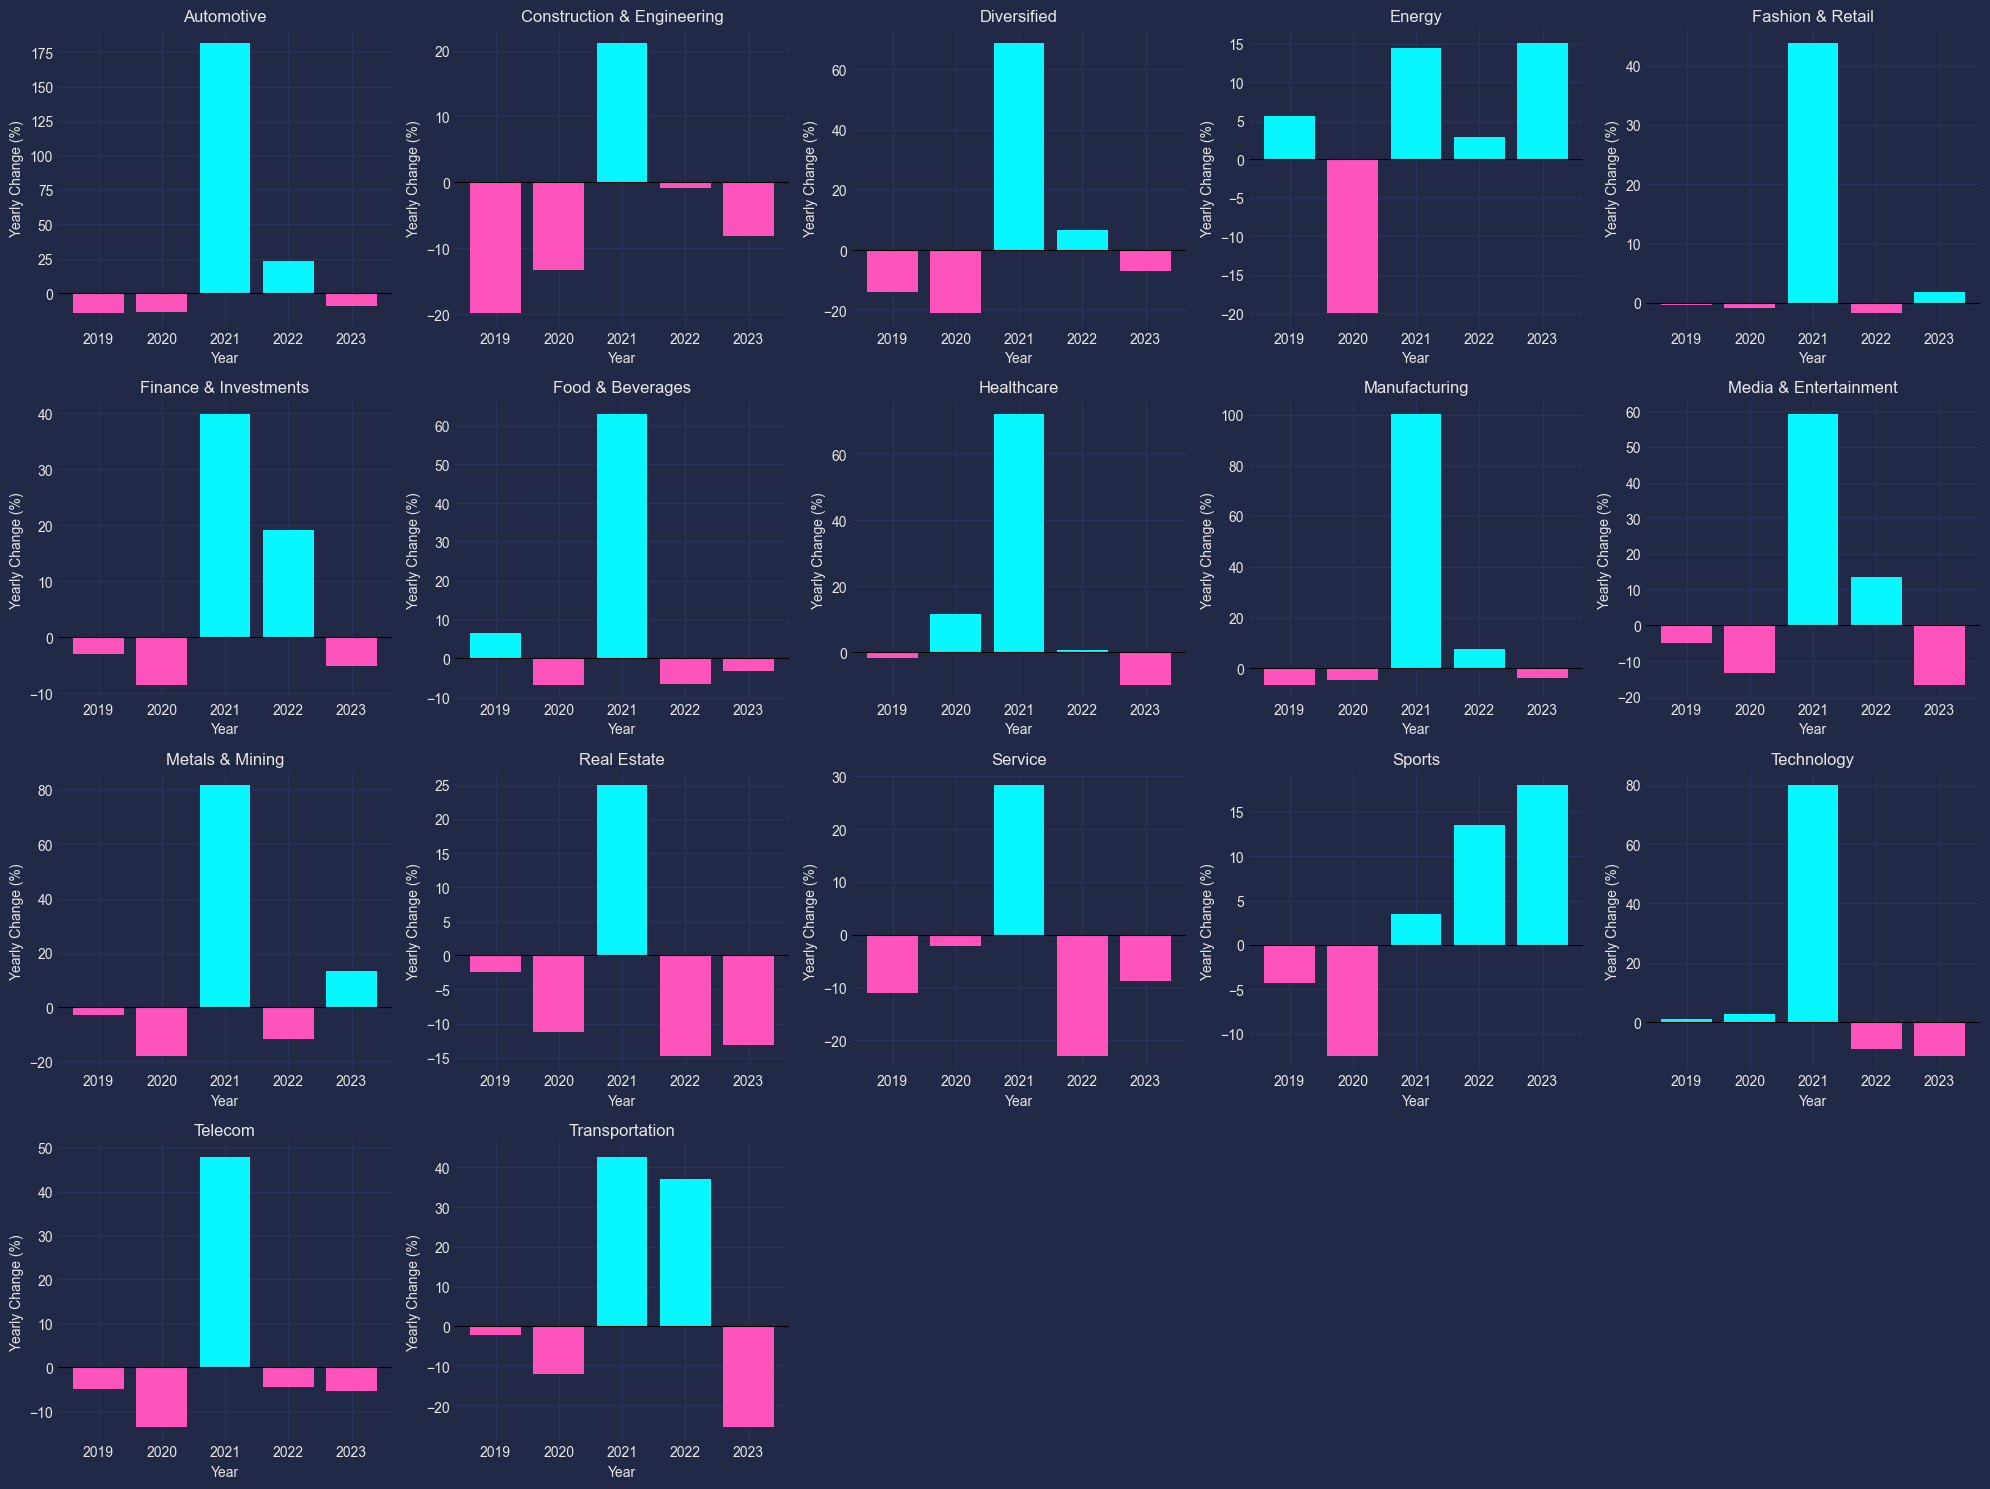

In [11]:
try:
  pivot_table_2018_2023 = pivot_table.copy().loc['2018':'2023']
  print("Data loaded successfully.")
except Exception as e:
  print(f"Error loading data: {e}")

# Ensure 'year' is set as index
try:
  pivot_table_2018_2023.set_index('year', inplace=True)
  print("Year set as index successfully.")
except Exception as e:
  print(f"Error setting year as index: {e}")

# Calculate percentage changes and plot
try:
  # Transpose the DataFrame so that years are on the y-axis
  pivot_table_transposed = pivot_table_2018_2023.transpose()

  # Calculate the year-over-year percentage change
  percentage_changes = pivot_table_transposed.pct_change(axis=1) * 100

  # Setting up a 4x5 grid of subplots
  fig, axs = plt.subplots(4, 5, figsize=(20, 15))

  # Flatten the array of axes for easy iteration
  axs = axs.flatten()

  # Iterate through the DataFrame columns and create a subplot for each industry
  for i, industry in enumerate(percentage_changes.index):
    ax = axs[i]
    ax.bar(percentage_changes.columns, percentage_changes.loc[industry], 
         color=['#FE53BB' if x < 0 else '#08F7FE' for x in percentage_changes.loc[industry]])
    ax.set_title(industry)
    ax.set_ylabel('Yearly Change (%)')
    ax.set_xlabel('Year')
    ax.axhline(0, color='black', linewidth=0.8)  # Add a line at zero
    ax.grid(True, axis='y')

  # Hide any unused subplots if there are less than 20 industries
  for i in range(len(percentage_changes.index), len(axs)):
    axs[i].set_visible(False)

  # Adjust the layout to prevent overlap
  plt.tight_layout()

  # Display the plot
  plt.show()
except Exception as e:
  print(f"Error in plotting: {e}")
